In [1]:
import matplotlib.pyplot as plt
import numpy as np
import copy as cp

In [2]:
sous_ensembles = {
    #"triangulaire" : [(0, 0), (1,0), (4,1), (6,0)],
   # "trapezoidal" : [(0, 0), (1,0), (4,1), (6,1), (8,0)],
    "random" : [(0, 0), (1,0), (4,1), (6,0.6), (7,0.3), (9,1), (10, 0.5), (15,0)],
}

In [3]:

def compute_membership(x, inflexion_points):
    for i in range(1, len(inflexion_points)):
        if x > inflexion_points[i][0]:
            continue
        else:
            m = (inflexion_points[i-1][1] - inflexion_points[i][1]) / (inflexion_points[i-1][0] - inflexion_points[i][0]) 
            b = inflexion_points[i][1] - m * inflexion_points[i][0]
            return m*x + b
        return 0
 
def compute_complement(inflexion_points):
    return [(inflexion_points[i][0], 1-inflexion_points[i][1]) for i in range(len(inflexion_points))]

In [4]:
def calculerDegreeAppartenance(x, ens):
    inx = None
    pt_prec = None
    pt_suiv = None
    for i in range(len(ens)):
        if x > ens[i][0] and x<ens[i+1][0]:
            pt_suiv = cp.deepcopy(ens[i+1])
            pt_prec = cp.deepcopy(ens[i])
            break
    if not pt_prec or not pt_suiv:
        return 0
    y = np.array([pt_prec[1], pt_suiv[1]])
    k = np.array([[pt_prec[0], 1], [pt_suiv[0], 1]])
    res = np.linalg.solve(k,y)
    a, b = res[0], res[1]
    return a*x +b

In [5]:
calculerDegreeAppartenance(5, [(0, 0), (1,0), (4,1), (6,0.6), (7,0.3), (9,1), (10, 0.5), (15,0)])

0.7999999999999998

In [6]:
def visualisation(**kwargs):
    plt.figure()
    for key, value in kwargs.items():
        x = []
        y = []
        for pt in value:
            x.append(pt[0])
            y.append(pt[1])
        plt.plot(x, y, label=key)
        plt.legend(loc="upper right")

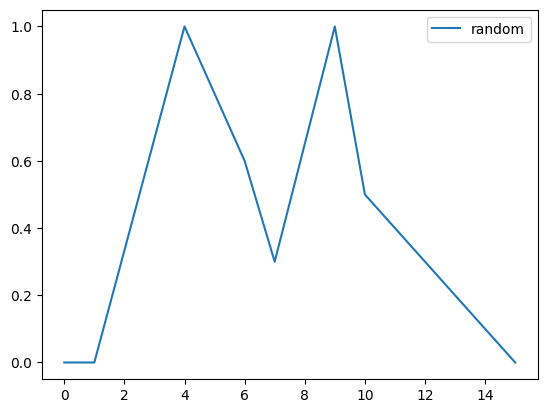

In [7]:
visualisation(**sous_ensembles)

In [8]:
def complementaire(ens):
    return [(x[0], 1-x[1]) for x in ens]

In [9]:
sous_ensembles["random_complementaire"] = complementaire(sous_ensembles["random"])

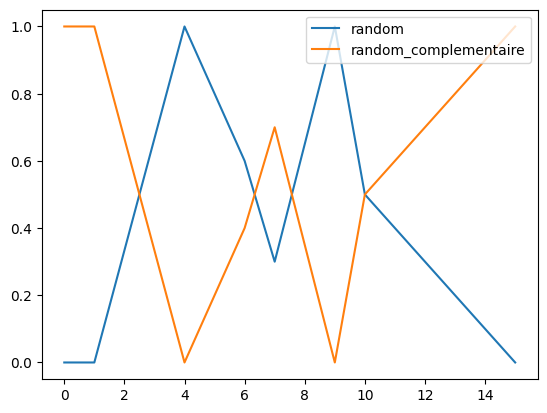

In [10]:
visualisation(**sous_ensembles)

In [11]:
class T_norm:
    def __init__(self, type="probabiliste"):
        self.type = type
    
    def calculer(self, x ,y):
        if self.type == "probabiliste":
            return x*y
        if self.type == "lukasiewicz":
            return max(x+y-1,0)
        if self.type == "zadeh":
            return min(x, y)
        if self.type == "hamacher":
            if x == y and x == 0:
                return 0
            return (x*y)/(x+y-x*y)
        if self.type == "drastique":
            if x == 1:
                return y
            if y == 1:
                return x
            return 0
    
class TCoNorm:
    def __init__(self, type="probabiliste"):
        self.type = type
 
    def calculer(self, x, y):
        if self.type == 'probabiliste':
            return x+y-x*y
        elif self.type == 'lukasiewicz':
            return np.min(x+y, 1)
        elif self.type == 'zadeh':
            return np.max(x,y)
        elif self.type == 'hamacher':
            return (x+y)/ (1+x*y)
        elif self.type == 'drastique':
            if x == 0:
                return y
            elif y == 0:
                return x
            else:
                return 1
        else:
            return None

### Principe d'extension

In [12]:
import ipdb
class FuzzyImage:
    def __init__(self, fn):
        self.fn = fn
        
    def calcule(self, x):
        return self.fn(x)
        
    def antecedent(self, y, set_):
        ants = []
        for x_i in set_:
            if self.calcule(x_i) == y:
                ants.append(x_i)
        return ants

def fn(x):
    return x * x

def extension(ensX, Y_s, phi):
    # ensX de la forme [(0,0), (1, 0.2), ...]
    # discretisation de l'espace
    interval_X = np.linspace(ensX[0][0], ensX[-1][0], 5)
    res = []
    for y in range(len(Y_s)):
        ants = phi.antecedent(Y_s[y], interval_X)
        if len(ants) == 0:
            res.append((y, 0))
            continue
        max_f_a = max([compute_membership(ant, ensX) for ant in ants])
        res.append((y, max_f_a))
    return res

In [13]:
phi = FuzzyImage(fn)

In [14]:
sous_ensembles['tme_4'] = [(0,0), (1, 0.3), (2, 0.4),(3, 1), (3.5, 0.7), (4, 0.2)]
Y_s = [3, 8, 9, 4]

res_Y = extension(sous_ensembles['tme_4'], Y_s, phi)

# Nous allons mettre les résultats dans un dictionnaire pour 
# pouvoir utiliser notre fonction de visualisation.
sef_A = {'f_A': sous_ensembles['tme_4']}
sef_B = {'f_B': res_Y}

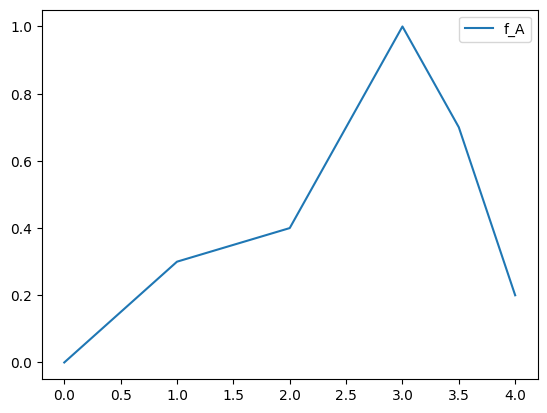

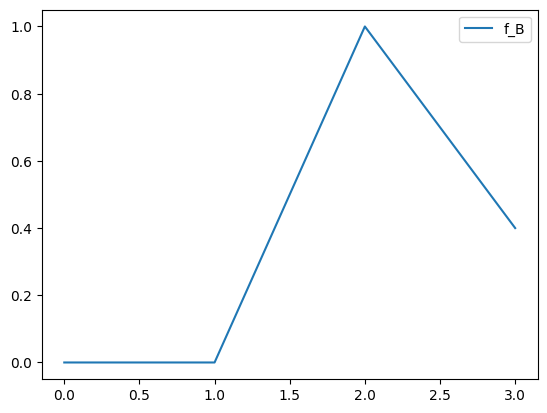

In [15]:
visualisation(**sef_A)
visualisation(**sef_B)